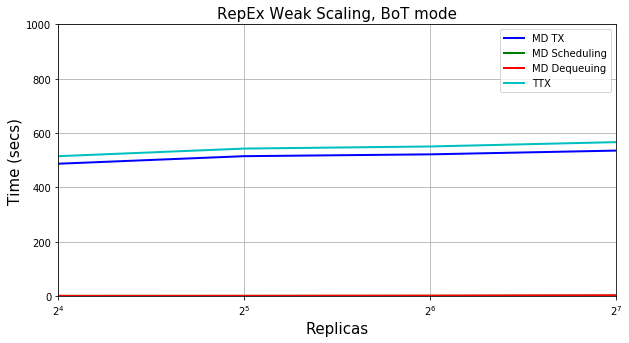

In [2]:
import os
import sys
import glob
import pprint
import radical.utils as ru
import radical.pilot as rp
import radical.entk as re
import radical.analytics as ra
import pickle
import matplotlib.pyplot as plt
import plotly.plotly as py
import numpy as np



sessionnames = [
               're.session.two.scm177.017659.0008', #8 replicas
               're.session.two.scm177.017659.0010', #16 replicas
               're.session.two.scm177.017659.0012', #32 replicas
               're.session.two.scm177.017659.0014', #64 replicas
               're.session.two.scm177.017659.0016' #128 replicas
              ]

replica_counts = [8, 16, 32, 64, 128]
MD_tx = []
EX_tx = []
MD_scheduling = []
EX_scheduling = []
MD_dequeuing = []
EX_dequeuing = []
TTX = []

wd = os.getcwd() 

def gettimes(sessionname):
    
    
    session = ra.Session(sid   = sessionname,
                         stype = 'radical.entk',
                         src   = wd)


    with open('MDLIST_%s'%sessionname, 'rb') as mdlist:
        md_task_list=pickle.load(mdlist)
    with open('EXLIST_%s'%sessionname, 'rb') as exlist:
        ex_task_list=pickle.load(exlist)

    md                      = session.filter(etype='task', inplace=False,  uid=md_task_list)
    md_scheduling_durations = md.duration([re.states.SCHEDULED, re.states.SUBMITTED])
    MD_scheduling.append(md_scheduling_durations)
    md_dequeuing_durations  = md.duration([re.states.COMPLETED, re.states.DONE])
    MD_dequeuing.append(md_dequeuing_durations)
    md_durations            = md.duration([re.states.SUBMITTED, re.states.COMPLETED])
    MD_tx.append(md_durations)
    
    
    ex                      = session.filter(etype='task', inplace=False,  uid=ex_task_list)
    ex_scheduling_durations = ex.duration([re.states.SCHEDULED, re.states.SUBMITTED])
    EX_scheduling.append(ex_scheduling_durations)
    ex_dequeuing_durations  = ex.duration([re.states.COMPLETED, re.states.DONE])
    EX_dequeuing.append(ex_dequeuing_durations)
    ex_durations            = ex.duration([re.states.SUBMITTED, re.states.COMPLETED])
    EX_tx.append(ex_durations)

    total                   = session.filter(etype='task', inplace=False)
    total_durations         = total.duration([re.states.SCHEDULED, re.states.DONE])
    TTX.append(total_durations)

for i in range(len(sessionnames)):    
    gettimes(sessionnames[i])
    
    
x = np.asarray(replica_counts)
y1 = np.asarray(MD_tx)
y2 = np.asarray(MD_scheduling)  
y3 = np.asarray(MD_dequeuing)
z1 = np.asarray(EX_tx)
z2 = np.asarray(EX_scheduling)
z3 = np.asarray(EX_dequeuing)
t  = np.asarray(TTX)



fig=plt.figure(figsize=(10,5))
plt.grid(True)
plt.xscale('log',basex=2)
plt.title("RepEx Weak Scaling, BoT mode",fontsize=15)
plt.axis([16,128,0,1000])
plt.xlabel("Replicas", fontsize=15)
plt.ylabel("Time (secs)", fontsize=15)
plt.plot(x , y1, linewidth=2.0, color='b', label = 'MD TX')
plt.plot(x , y2, linewidth=2.0, color='g', label = 'MD Scheduling')
plt.plot(x , y3, linewidth=2.0, color='r', label = 'MD Dequeuing')
plt.plot(x , t, linewidth=2.0, color='c', label = 'TTX')
plt.legend()
plt.show(fig)